# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [35]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [37]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url="https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [38]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [39]:
# Extract all rows of data
mars_temp_table = soup.find_all('table')
mars_df = pd.read_html(str(mars_temp_table))[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [40]:
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [41]:
# Create an empty list
mars_temp = []
# Loop through the scraped data to create a list of rows
mars_weather_table = table.find_all('th')

for header_element in mars_weather_table:
    title = header_element.text
    mars_temp.append(title)
mars_temp

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [42]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(columns=mars_temp)
for row in table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(mars_temp_df)
        mars_temp_df.loc[lenghth]=row_data

In [43]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [44]:
# Examine data type of each column
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 116.7+ KB


In [45]:
# Change data types for data analysis
mars_temp_df['id']=mars_temp_df['id'].astype(int)
mars_temp_df['terrestrial_date']=pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol']=mars_temp_df['sol'].astype(int)
mars_temp_df['ls']=mars_temp_df['ls'].astype(int)
mars_temp_df['month']=mars_temp_df['month'].astype(int)
mars_temp_df['min_temp']=mars_temp_df['min_temp'].astype(float)
mars_temp_df['pressure']=mars_temp_df['pressure'].astype(float)

In [46]:
# Confirm type changes were successful by examining data types again
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [47]:
# 1. How many months are there on Mars?
month=mars_temp_df['month'].nunique()
print(f' Mars has {month} months')

 Mars has 12 months


In [48]:
# 2. How many Martian days' worth of data are there?
sol=mars_temp_df['sol'].nunique()
print(f' There is {sol} Martian days worth of data.')

 There is 1867 Martian days worth of data.


In [55]:
# 3. What is the average low temperature by month?
Avg_temp_by_month=mars_temp_df.groupby(['month'])['min_temp'].mean()
Avg_temp_by_month=Avg_temp_by_month.to_frame()
Avg_temp_by_month=Avg_temp_by_month.reset_index()
Avg_temp_by_month

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


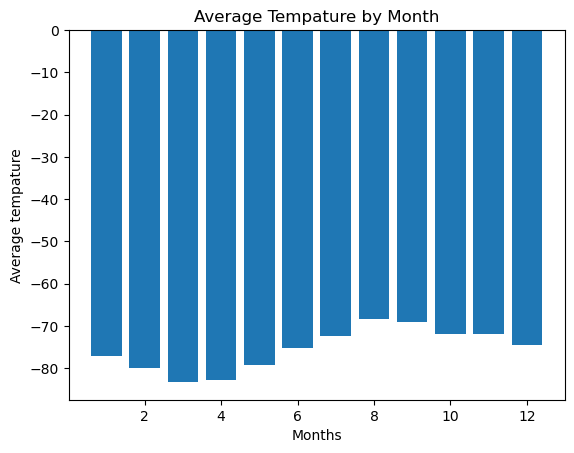

In [59]:
# Plot the average temperature by month
plt.bar(Avg_temp_by_month['month'] , Avg_temp_by_month['min_temp'])
plt.xlabel('Months')
plt.ylabel('Average tempature')
plt.title('Average Tempature by Month')
plt.show()

In [60]:
# Identify the coldest and hottest months in Curiosity's location
Sort_temp_by_month=Avg_temp_by_month.sort_values(by='min_temp')
Sort_temp_by_month

,month,min_temp
2,3,-83.307292
3,4,-82.747423
1,2,-79.932584
4,5,-79.308725
0,1,-77.160920
5,6,-75.299320
11,12,-74.451807
6,7,-72.281690
10,11,-71.985507
9,10,-71.982143


In [61]:
print('As above the coldest month is the 3rd and the hottest month is 8th.')

As above the coldest month is the 3rd and the hottest month is 8th.


In [62]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_temp_df.groupby('month')['pressure'].mean()
avg_pressure_by_month=avg_pressure_by_month.to_frame()
avg_pressure_by_month=avg_pressure_by_month.reset_index()
avg_pressure_by_month=avg_pressure_by_month.rename(columns={'pressure':'Average Pressure'})
avg_pressure_by_month

,month,Average Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


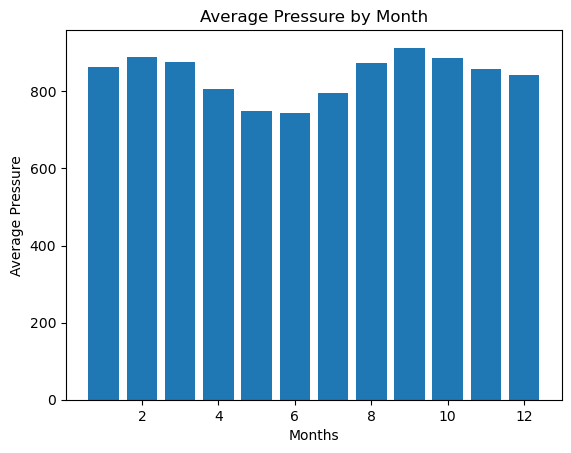

In [63]:
# Plot the average pressure by month
plt.bar(avg_pressure_by_month['month'] , avg_pressure_by_month['Average Pressure'])
plt.xlabel('Months')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.show()

In [66]:
# Identify the lowest and highest months for pressure
Sort_pressure_by_month=avg_pressure_by_month.sort_values(by='Average Pressure')
Sort_pressure_by_month

,month,Average Pressure
5,6,745.054422
4,5,748.557047
6,7,795.105634
3,4,806.329897
11,12,842.156627
10,11,857.014493
0,1,862.488506
7,8,873.829787
2,3,877.322917
9,10,887.312500


In [70]:
print('As above the average lowest monthly pressure is month 6 and the highest is month 9')

As above the average lowest monthly pressure is month 6 and the highest is month 9


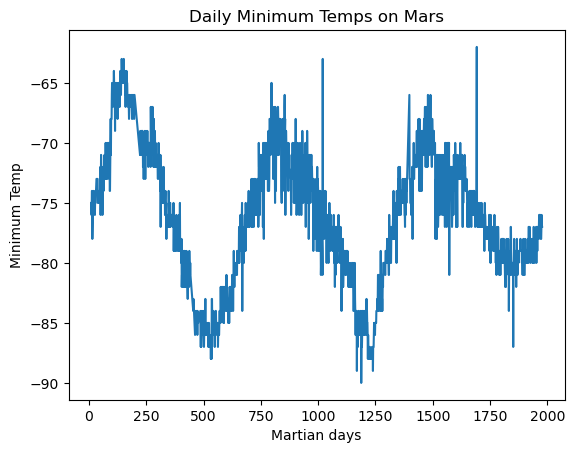

In [71]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(mars_temp_df['sol'], mars_temp_df['min_temp'])
plt.xlabel('Martian days')
plt.ylabel('Minimum Temp')
plt.title('Daily Minimum Temps on Mars')
plt.show()

In [72]:
print('From the cycles above the Martian year appears to be approximately 700 Earth Days')

From the cycles above the Martian year appears to be approximately 700 Earth Days


#SUMMARY

##Mars has 12 Months.

##There is 1867 Martian days worth of data.

##The coldest month is the 3rd and the hottest month is 8th.

##The average lowest monthly pressure is month 6 and the highest is month 9.

##Visualy the Martian year appears to be approximately 700 Earth Days.




### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [73]:
# Write the data to a CSV
mars_temp_df.to_csv('mars_weather',  encoding='utf8', index=False , )

In [74]:
browser.quit()